# Analyzing Tabular Data using Python and Pandas

![](https://i.imgur.com/zfxLzEv.png)


This tutorial series is a beginner-friendly introduction to programming and data analysis using the Python programming language. These tutorials take a practical and coding-focused approach. The best way to learn the material is to execute the code and experiment with it yourself. 

## Reading a CSV file using Pandas

[Pandas](https://pandas.pydata.org/) is a popular Python library used for working in tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL, and more. Let's download a file `italy-covid-daywise.txt` which contains day-wise Covid-19 data for Italy in the following format:

```date,new_cases,new_deaths,new_tests
2020-04-21,2256.0,454.0,28095.0
2020-04-22,2729.0,534.0,44248.0
2020-04-23,3370.0,437.0,37083.0
2020-04-24,2646.0,464.0,95273.0
2020-04-25,3021.0,420.0,38676.0
2020-04-26,2357.0,415.0,24113.0
2020-04-27,2324.0,260.0,26678.0
2020-04-28,1739.0,333.0,37554.0
...
```

This format of storing data is known as *comma-separated values* or CSV. 

> **CSVs**: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)


We'll download this file using the `urlretrieve` function from the `urllib.request` module.

In [2]:
import pandas as pd 

In [3]:
from urllib.request import urlretrieve

In [4]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x2c5287e4040>)

In [5]:
covid_df = pd.read_csv('italy-covid-daywise.csv') # covid_df k ander humne csv ko read krke daaldiya hai 

In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [8]:
covid_df.describe() # ye poora Stat batadega yaar

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [9]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [10]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

Here's a summary of the functions & methods we've looked at so far:

* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `.describe()` - View statistical information about numeric columns
* `.columns` - Get the list of column names
* `.shape` - Get the number of rows & columns as a tuple

# Yaha pr ek concept hai bhaut jabardast
pandas mai jo table or frames bante hai vo ek dictionary list hai, yani ki column ka name hai dictionalry ki keys, values mai rows data list format mai store hai, this is the concept which is very great in pandas...
## Retrieving data from a data frame

The first thing you might want to do is retrieve data from this data frame, e.g., the counts of a specific day or the list of values in a particular column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: keys are column names, and values are lists/arrays containing data for the respective columns. 

In [12]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}  #ye poora hi dataframe hai lekin ye dictionary ki form mai store hota hai easily 

Representing data in the above format has a few benefits:

* All values in a column typically have the same type of value, so it's more efficient to store them in a single array.
* Retrieving the values for a particular row simply requires extracting the elements at a given index from each column array.
* The representation is more compact (column names are recorded only once) compared to other formats that use a dictionary for each row of data (see the example below).

In [16]:
covid_data_dict['new_cases'] # we  can retreive the data like in the way

[1444, 1365, 996, 975, 1326]

In [17]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [18]:
covid_df['new_cases'][240]

1366.0

Pandas also provides the `.at` method to retrieve the element at a specific row & column directly.

In [22]:
covid_df.at[246, 'new_cases'] # at se value nikalo fatafat jldi easily bhaut aram se 

975.0

In [21]:
covid_df.tail(20)

,date,new_cases,new_deaths,new_tests
228,2020-08-15,574.0,3.0,25937.0
229,2020-08-16,629.0,158.0,22470.0
230,2020-08-17,477.0,4.0,21379.0
231,2020-08-18,320.0,4.0,32687.0
232,2020-08-19,401.0,5.0,41290.0
233,2020-08-20,642.0,7.0,49662.0
234,2020-08-21,840.0,6.0,44943.0
235,2020-08-22,947.0,9.0,46613.0
236,2020-08-23,1071.0,3.0,47463.0
237,2020-08-24,1209.0,7.0,33358.0


The new data frame `cases_df` is simply a "view" of the original data frame `covid_df`. Both point to the same data in the computer's memory. Changing any values inside one of them will also change the respective values in the other. Sharing data between data frames makes data manipulation in Pandas blazing fast. You needn't worry about the overhead of copying thousands or millions of rows every time you want to create a new data frame by operating on an existing one.

Sometimes you might need a full copy of the data frame, in which case you can use the `copy` method.

In [23]:
covid_df_copy = covid_df.copy()

In [25]:
covid_df.loc[20] # ye ek list hai or location means to acess the entire row of dictionary or df 

date          2020-01-20
new_cases            0.0
new_deaths           0.0
new_tests            NaN
Name: 20, dtype: object

In [26]:
covid_df.new_tests.first_valid_index()

111

In [29]:
covid_df.loc[10:20] # 10 se 20 tak saari rows print krdo bhaiya 

,date,new_cases,new_deaths,new_tests
10,2020-01-10,0.0,0.0,NaN
11,2020-01-11,0.0,0.0,NaN
12,2020-01-12,0.0,0.0,NaN
13,2020-01-13,0.0,0.0,NaN
14,2020-01-14,0.0,0.0,NaN
15,2020-01-15,0.0,0.0,NaN
16,2020-01-16,0.0,0.0,NaN
17,2020-01-17,0.0,0.0,NaN
18,2020-01-18,0.0,0.0,NaN
19,2020-01-19,0.0,0.0,NaN


In [35]:
covid_df_copy.sample(10)

,date,new_cases,new_deaths,new_tests
213,2020-07-31,382.0,3.0,29686.0
125,2020-05-04,1389.0,174.0,22999.0
73,2020-03-13,2651.0,189.0,NaN
108,2020-04-17,3786.0,525.0,NaN
145,2020-05-24,669.0,119.0,34206.0
82,2020-03-22,6557.0,795.0,NaN
109,2020-04-18,3493.0,575.0,NaN
99,2020-04-08,3039.0,604.0,NaN
190,2020-07-08,137.0,30.0,28679.0
0,2019-12-31,0.0,0.0,NaN


In [37]:
total_cases = covid_df.new_cases.sum()
total_cases

271515.0

In [39]:
total_deaths = covid_df.new_deaths.sum()
total_deaths

35497.0

In [61]:
total_test = covid_df.new_tests.sum()
total_test

4279456.0

In [40]:
print("There are total {} new cases & the {} total number of deaths in italy has been done".format(total_cases, total_deaths))

There are total 271515.0 new cases & the 35497.0 total number of deaths in italy has been done


## Querying and sorting rows

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [41]:
high_new_cases = covid_df.new_cases > 1000

In [42]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [44]:
covid_df[high_new_cases] # isne inko data frames mai represnt krdiya aaram se 

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [54]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [57]:
from IPython.display import display
with pd.option_context('display.max_rows', 10):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [68]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [71]:
covid_df.drop(columns=['positive_rate'], inplace=True) # is inplace ka matlab hai,

In [72]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


The line `covid_df.drop(columns=['positive_rate'], inplace=True)` is used to remove a column named `positive_rate` from a pandas DataFrame called `covid_df`. Here's a breakdown of the components:

- `covid_df`: This is the DataFrame from which you want to drop the column.

- `drop(columns=['positive_rate'])`: This specifies that you want to drop the column named `positive_rate`. The `columns` parameter takes a list of column names, allowing you to drop multiple columns if needed.

- `inplace=True`: This argument means that the operation will be done in place, modifying the original DataFrame `covid_df` directly without needing to reassign it. If `inplace` were set to `False` (or omitted), the operation would return a new DataFrame with the specified column(s) dropped, leaving the original DataFrame unchanged.

In summary, the line effectively removes the `positive_rate` column from the `covid_df` DataFrame and updates `covid_df` to reflect this change.

In [81]:
positive_rate = total_cases /total_test

In [82]:
positive_rate

0.06344614829548428

In [85]:
covid_df.sort_values('new_cases', ascending= False).head(20)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [87]:
covid_df.sort_values('new_deaths', ascending= False).head(20)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [89]:
covid_df.sort_values('new_cases').head(10) # isne bydefault new_cases column ko ascending order mai convert krdi hai

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [96]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[172, 'new_cases'])/2

In [99]:
covid_df.loc[172]

date          2020-06-20
new_cases         314.25
new_deaths          47.0
new_tests        29875.0
Name: 172, dtype: object

## Working with dates

While we've looked at overall numbers for the cases, tests, positive rate, etc., it would also be useful to study these numbers on a month-by-month basis. The `date` column might come in handy here, as Pandas provides many utilities for working with dates.

In [100]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [102]:
date_time = pd.to_datetime(covid_df.date)

In [103]:
date_time

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [108]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day

In [109]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [110]:
covid_df_may = covid_df[covid_df.month==5]

In [111]:
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,weekday,day
122,2020-05-01,1872.0,285.0,43732.0,2020,5,4,1
123,2020-05-02,1965.0,269.0,31231.0,2020,5,5,2
124,2020-05-03,1900.0,474.0,27047.0,2020,5,6,3
125,2020-05-04,1389.0,174.0,22999.0,2020,5,0,4
126,2020-05-05,1221.0,195.0,32211.0,2020,5,1,5
127,2020-05-06,1075.0,236.0,37771.0,2020,5,2,6
128,2020-05-07,1444.0,369.0,13665.0,2020,5,3,7
129,2020-05-08,1401.0,274.0,45428.0,2020,5,4,8
130,2020-05-09,1327.0,243.0,36091.0,2020,5,5,9
131,2020-05-10,1083.0,194.0,31384.0,2020,5,6,10


In [112]:
covid_df_may_totals = covid_df_may[['new_cases', 'new_deaths']].sum()

In [113]:
covid_df_may_totals

new_cases     29073.0
new_deaths     5658.0
dtype: float64

In [114]:
covid_df_may['new_cases'].sum()

29073.0

In [115]:
covid_df_may.sum()

date          2020-05-012020-05-022020-05-032020-05-042020-0...
new_cases                                               29073.0
new_deaths                                               5658.0
new_tests                                             1078720.0
year                                                      62620
month                                                       155
weekday                                                      99
day                                                         496
dtype: object

In [ ]:
covid_df_may.sum()

date          2020-05-012020-05-022020-05-032020-05-042020-0...
new_cases                                               29073.0
new_deaths                                               5658.0
new_tests                                             1078720.0
year                                                      62620
month                                                       155
weekday                                                      99
day                                                         496
dtype: object

In [123]:
covid_df_month = covid_df.groupby('month')[['new_cases', 'new_deaths','new_tests']].sum()

In [124]:
covid_df_month

,new_cases,new_deaths,new_tests
month,,,
1,3.00,0.0,0.0
2,885.00,21.0,0.0
3,100851.00,11570.0,0.0
4,101852.00,16091.0,419591.0
5,29073.00,5658.0,1078720.0
6,8234.25,1404.0,830354.0
7,6722.00,388.0,797692.0
8,21060.00,345.0,1098704.0
9,3297.00,20.0,54395.0


In [125]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [126]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,274.475000,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the `cumsum` method to compute the cumulative sum of a column as a new series. Let's add three new columns: `total_cases`, `total_deaths`, and `total_tests`.

In [155]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df

covid_df['total_tests'] = covid_df.new_tests.cumsum()
covid_df

covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,location,total_tests,total_deaths
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31,0.00,Italy,NaN,0.0
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1,0.00,Italy,NaN,0.0
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2,0.00,Italy,NaN,0.0
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3,0.00,Italy,NaN,0.0
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4,0.00,Italy,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30,267315.25,Italy,4182478.0,35473.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31,268680.25,Italy,4225061.0,35477.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269676.25,Italy,4279456.0,35483.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270651.25,Italy,NaN,35491.0


In [156]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x2c53c0d8640>)

In [157]:
locations_df = pd.read_csv('locations.csv')

In [158]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [159]:
covid_df['location'] = "Italy"

In [134]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,location
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31,0.00,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1,0.00,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2,0.00,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3,0.00,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4,0.00,Italy
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30,267315.25,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31,268680.25,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269676.25,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270651.25,Italy


In [135]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [160]:
merged_df =covid_df.merge(locations_df, on = "location")

In [161]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,location,total_tests,total_deaths,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30,267315.25,Italy,4182478.0,35473.0,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31,268680.25,Italy,4225061.0,35477.0,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269676.25,Italy,4279456.0,35483.0,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270651.25,Italy,NaN,35491.0,Europe,60461828.0,83.51,3.18,35220.084


In [167]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [162]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [163]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [164]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,location,total_tests,total_deaths,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,tests_per_million,deaths_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,1,31,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084,NaN,0.000000
1,2020-01-01,0.0,0.0,NaN,2020,1,2,1,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084,NaN,0.000000
2,2020-01-02,0.0,0.0,NaN,2020,1,3,2,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084,NaN,0.000000
3,2020-01-03,0.0,0.0,NaN,2020,1,4,3,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084,NaN,0.000000
4,2020-01-04,0.0,0.0,NaN,2020,1,5,4,0.00,Italy,NaN,0.0,Europe,60461828.0,83.51,3.18,35220.084,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,30,267315.25,Italy,4182478.0,35473.0,Europe,60461828.0,83.51,3.18,35220.084,69175.513516,586.700753
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,31,268680.25,Italy,4225061.0,35477.0,Europe,60461828.0,83.51,3.18,35220.084,69879.809125,586.766910
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269676.25,Italy,4279456.0,35483.0,Europe,60461828.0,83.51,3.18,35220.084,70779.467667,586.866146
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270651.25,Italy,NaN,35491.0,Europe,60461828.0,83.51,3.18,35220.084,NaN,586.998461


## Writing data back to files

After completing your analysis and adding new columns, you should write the results back to a file. Otherwise, the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing just the columns we wish to record.m

In [168]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [169]:
result_df.to_csv('result.csv', index=None)

<Axes: >

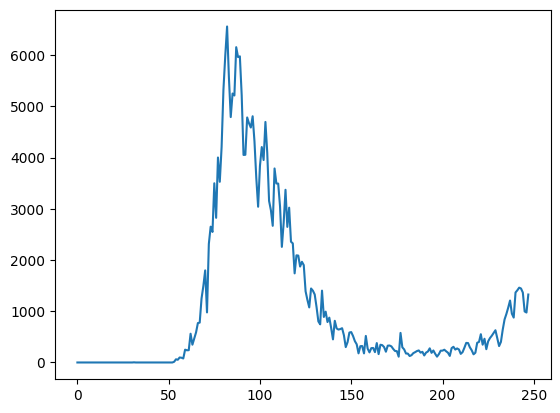

In [171]:
result_df.new_cases.plot()

<Axes: >

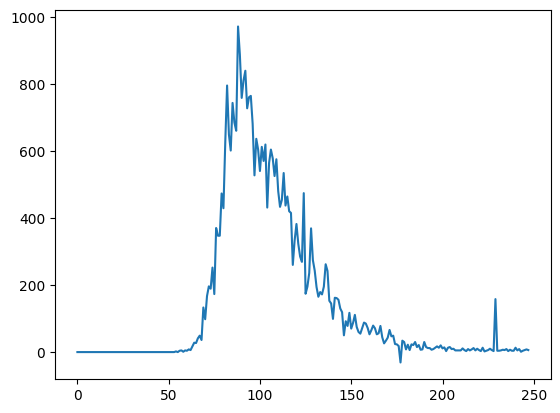

In [172]:
result_df.new_deaths.plot()

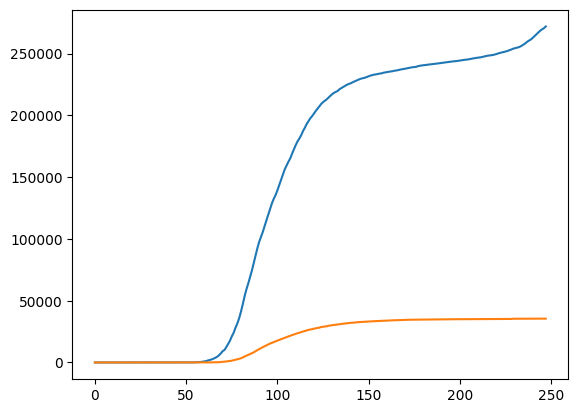

In [173]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

In [174]:
death_rate = result_df.total_deaths / result_df.total_cases

<Axes: title={'center': 'Death Rate'}>

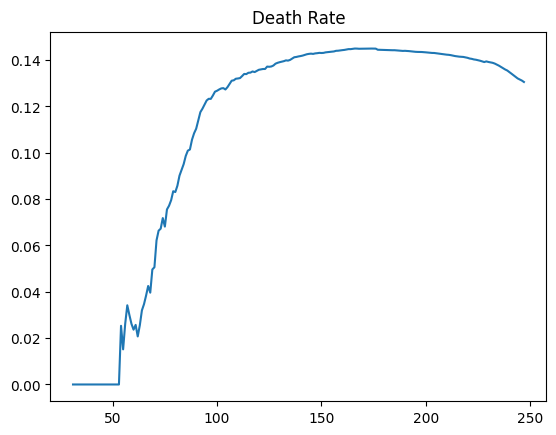

In [178]:
death_rate.plot(title='Death Rate')

<Axes: xlabel='month'>

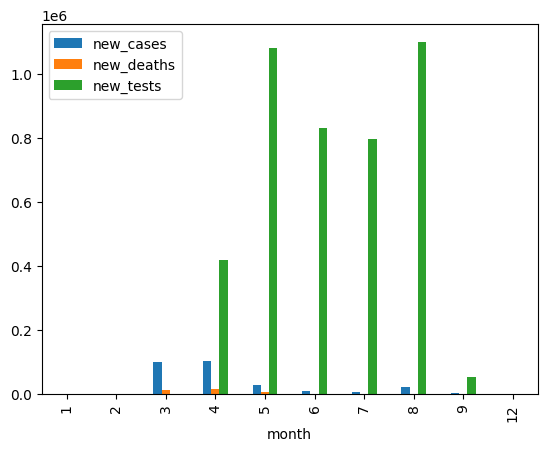

In [182]:
covid_df_month.plot(kind='bar')